<a href="https://colab.research.google.com/github/ThiagoWilian/Portifolio/blob/main/Projeto_King_County.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Projeto King_County

## 1. A questão de negócio

  A Roof Imóveis, uma empresa do ramo imobiliário brasileiro, nos contratou para realizar uma análise de imóveis no Condado de King em Washington e apontar quais são os 5 melhores imóveis para realizar um investimento e 5 imóveis nos quais não indicamos o investimento.
  A partir dos dados disponibilizados iremos realizar análises de correlações para extrair insights e ao final ter uma lista dos 10 imóveis com embasamento em dados.


## 2. O entendimento do negócio

## 2.1 Apresentação



A Roof Imóveis é uma das maiores empresas do ramo imobiliário brasileiro. Seu objetivo é entender melhor o mercado imobiliário utilizando da tecnologia para antever as necessidades de compras de casas e assim, expandir sua área de atuação realizando investimentos em imóveis internacionais. O primeiro passo dessa expansão será através do investimento em imóveis no Condado de King County, nos Estados Unidos.

O Condado de King é um dos 39 condados do estado americano de Washington. A sede e cidade mais populosa do condado é Seattle. Foi fundado em 1852. Com mais de 2,2 milhões de habitantes, de acordo com o censo nacional de 2020, é o condado mais populoso do estado e o 12º mais populoso do país.

Este projeto tem o objetivo de realizar a indicação de 5 imóveis que sejam uma boa opção de investimento para a empresa e 5 imóveis nos quais a empresa não deve investir. 

##2.2 Sobre os dados

Os dados que utilizamos foi retirado do Kaggle, disponível no endereço:
https://www.kaggle.com/harlfoxem/housesalesprediction

O Dataset apresenta a venda de imóveis e suas características na região de Maio de 2014 à Maio de 2015. Tem um total de 21613 registros com um total de 21 atributos

#### 2.2.1 Dicionário dos Dados

O Dataset disponibilizado possui os registros de:
* ID (Identificador único do imóvel)
* date (data de venda do imóvel)
* price (preço de venda do imóvel na data de registro)
* bedrooms (quantidade de quartos)
* bathrooms (quantidade de banheiros)
* sqft_liv (tamanho da área habitável em ft²)
* sqft_lot (tamanho do terreno em ft²)
* floors (número de andares)
* waterfront (indicativo se o imóvel é localizado a beira-mar)
* view (classificação numérica da vista do imóvel variando de 0 a 4)
* condition (condição do imóvel variando de 1 a 5)
* grade (classificação dos materiais utilizados na construção do imóvel)
* sqft_above (Área em acima do solo em ft²)
* sqft_basmt (Área em abaixo do solo em ft²)
* yr_built (ano de construção do imóvel)
* yr_renov (ano de restauração)
* zipcode (código postal do imóvel)
* lat (latitude)
* long (longitude)
* squft_liv15 (Média da área habitável dos 15 imóveis mais próximos, em ft²)
* squft_lot15 (Média da área do lote dos 15 imóveis mais próximos, em ft²)


## 3. Coleta de dados

Será utilizado os imóveis com mais de uma venda registrada para fins de comparação da cidade com maior quantidade de negociação pois isso será uma indicativo da melhor região para investir

Como estratégia de negócio iremos avaliar as melhores escolhas dos imóveis que não tiveram vendas duplicadas,  pois a sua valorização tende a ser maior por não ter muitas negociações. Alguns parâmetros de pés quadrados se fazem presentes, tomamos como principais a área construída fazendo com este a comparação dos valores dos imóveis para melhor escolha.


Para dar unício à coleta de dados é preciso instalar e importar as bibliotecas a serem usadas.

In [ ]:
# instalando a biblioteca uszipcode
!pip install uszipcode

In [ ]:
# Importando bibliotecas
from uszipcode import SearchEngine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as stats


/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Em seguida, foi preciso importar o arquivo com os dados a serem avaliados.

In [ ]:
# Fazendo upload do arquivo
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [ ]:
#Carregando o dataset
df = pd.read_csv('/content/kc_house_data.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Foi preciso avaliar as informações para verificar o tipo dos dados.

In [ ]:
# Verificando as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# Verificando as dimenções do dataset
df.shape

(21613, 21)

## 2. A limpeza dos Dados

Dando início ao processo de limpeza dos dados, é preciso avaliar a existência de campos não preenchidos e editar a forma de apresentação das datas na coluna "date".

In [ ]:
# Verificando se há dados faltantes
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# Formatando a data
df['date'] = pd.to_datetime(df['date'])


In [ ]:
# Armazenando a função SearchEngine() dentro de uma variável 
search = SearchEngine()

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


In [ ]:
# Criando uma coluna que tem como resultado as cidades consultadas pelo zipcode
df['city'] = df['zipcode'].map(lambda x: search.by_zipcode(x).major_city)
df[['zipcode','city']].head(5)

,zipcode,city
0,98178,Seattle
1,98125,Seattle
2,98028,Kenmore
3,98136,Seattle
4,98074,Sammamish


## 3. Exploração dos dados

Nesta primeira analise temos como objetivo encostrar os IDs que se repetem, pois a repetição é indicador de mais de uma venda tendo em vista a comparação dos valores de venda.

A comparaçã dos valores de venda indicam valorização ou não do imóvel e, consequentemente, da região.

In [ ]:
#Verificando quantidade de imóveis repitidos
df['id'].duplicated().sum()

177

In [ ]:
# Avaliando quais IDs estão repetidos

sold = df.duplicated(subset='id')
df['sold'] = list(sold)
df[['id', 'date', 'price','sold','city']]

,id,date,price,sold,city
0,7129300520,2014-10-13,221900.0,False,Seattle
1,6414100192,2014-12-09,538000.0,False,Seattle
2,5631500400,2015-02-25,180000.0,False,Kenmore
3,2487200875,2014-12-09,604000.0,False,Seattle
4,1954400510,2015-02-18,510000.0,False,Sammamish
...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,False,Seattle
21609,6600060120,2015-02-23,400000.0,False,Seattle
21610,1523300141,2014-06-23,402101.0,False,Seattle
21611,291310100,2015-01-16,400000.0,False,Issaquah


In [ ]:
#Calculando a diferença entre o preço dos IDs repetidos

df['Diff'] = df.groupby(['id', 'city'], as_index=False)['price'].diff()
df[['id', 'date', 'price','sold', 'city', 'Diff']]

,id,date,price,sold,city,Diff
0,7129300520,2014-10-13,221900.0,False,Seattle,NaN
1,6414100192,2014-12-09,538000.0,False,Seattle,NaN
2,5631500400,2015-02-25,180000.0,False,Kenmore,NaN
3,2487200875,2014-12-09,604000.0,False,Seattle,NaN
4,1954400510,2015-02-18,510000.0,False,Sammamish,NaN
...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,False,Seattle,NaN
21609,6600060120,2015-02-23,400000.0,False,Seattle,NaN
21610,1523300141,2014-06-23,402101.0,False,Seattle,NaN
21611,291310100,2015-01-16,400000.0,False,Issaquah,NaN


In [ ]:
#Encontrando os repetidos
df.loc[ df['sold'] == True ]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,sold,Diff
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,0,...,1939,0,98117,47.6870,-122.386,1570,4500,Seattle,True,270000.0
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0,3,...,1997,0,98006,47.5503,-122.102,3860,11244,Bellevue,True,16000.0
325,7520000520,2015-03-11,240500.0,2,1.00,1240,12092,1.0,0,0,...,1922,1984,98146,47.4957,-122.352,1820,7460,Seattle,True,8500.0
346,3969300030,2014-12-29,239900.0,4,1.00,1000,7134,1.0,0,0,...,1943,0,98178,47.4897,-122.240,1020,7138,Seattle,True,74900.0
372,2231500030,2015-03-24,530000.0,4,2.25,2180,10754,1.0,0,0,...,1954,0,98133,47.7711,-122.341,1810,6929,Seattle,True,215000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,7853400250,2015-02-19,645000.0,4,3.50,2910,5260,2.0,0,0,...,2012,0,98065,47.5168,-121.883,2910,5260,Snoqualmie,True,35000.0
20613,2724049222,2014-12-01,220000.0,2,2.50,1000,1092,2.0,0,0,...,2004,0,98118,47.5419,-122.271,1330,1466,Seattle,True,56200.0
20670,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,0,0,...,2013,0,98045,47.4759,-121.734,2680,5992,North Bend,True,52010.0
20780,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,0,0,...,1933,0,98133,47.7076,-122.342,1130,1598,Seattle,True,140000.0


In [ ]:
# Categorizando como Valorizado, Igual e Desvalorizado

df.loc[ df['Diff'] > 0, 'market_value'  ] = "Valorizou"
df.loc[ df['Diff'] == 0, 'market_value' ] = "Igual"
df.loc[ df['Diff'] < 0, 'market_value'  ] = "Desvalorizou"
df.dropna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,sold,Diff,market_value
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,0,...,0,98117,47.6870,-122.386,1570,4500,Seattle,True,270000.0,Valorizou
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0,3,...,0,98006,47.5503,-122.102,3860,11244,Bellevue,True,16000.0,Valorizou
325,7520000520,2015-03-11,240500.0,2,1.00,1240,12092,1.0,0,0,...,1984,98146,47.4957,-122.352,1820,7460,Seattle,True,8500.0,Valorizou
346,3969300030,2014-12-29,239900.0,4,1.00,1000,7134,1.0,0,0,...,0,98178,47.4897,-122.240,1020,7138,Seattle,True,74900.0,Valorizou
372,2231500030,2015-03-24,530000.0,4,2.25,2180,10754,1.0,0,0,...,0,98133,47.7711,-122.341,1810,6929,Seattle,True,215000.0,Valorizou
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,7853400250,2015-02-19,645000.0,4,3.50,2910,5260,2.0,0,0,...,0,98065,47.5168,-121.883,2910,5260,Snoqualmie,True,35000.0,Valorizou
20613,2724049222,2014-12-01,220000.0,2,2.50,1000,1092,2.0,0,0,...,0,98118,47.5419,-122.271,1330,1466,Seattle,True,56200.0,Valorizou
20670,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,0,0,...,0,98045,47.4759,-121.734,2680,5992,North Bend,True,52010.0,Valorizou
20780,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,0,0,...,0,98133,47.7076,-122.342,1130,1598,Seattle,True,140000.0,Valorizou


Buscando as metricas de custo da área construida por pés quadrados.

In [ ]:
# organizando as casas decimais
pd.set_option('float_format', '{:.2f}'.format)

In [ ]:
#Calculando Preço por pés² do imóvel

precoArea = []


for p, s in zip(df['price'],df['sqft_living']):
    x = p/s
    precoArea.append(x)
df['price_per_area'] = precoArea
df['price_per_area']

0       188.05
1       209.34
2       233.77
3       308.16
4       303.57
         ...  
21608   235.29
21609   173.16
21610   394.22
21611   250.00
21612   318.63
Name: price_per_area, Length: 21613, dtype: float64

In [ ]:
#Calculando preço por pés² médio da cidade
meanPrice_per_city = df.groupby(['city'])['price_per_area'].mean()
df = df.set_index(['city'])
df['meanPrice_per_city'] = meanPrice_per_city
df = df.reset_index()
df.dropna()

,city,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,zipcode,lat,long,sqft_living15,sqft_lot15,sold,Diff,market_value,price_per_area,meanPrice_per_city
94,Seattle,6021501535,2014-12-23,700000.00,3,1.50,1580,5000,1.00,0,...,98117,47.69,-122.39,1570,4500,True,270000.00,Valorizou,443.04,304.77
314,Bellevue,4139480200,2014-12-09,1400000.00,4,3.25,4290,12103,1.00,0,...,98006,47.55,-122.10,3860,11244,True,16000.00,Valorizou,326.34,340.34
325,Seattle,7520000520,2015-03-11,240500.00,2,1.00,1240,12092,1.00,0,...,98146,47.50,-122.35,1820,7460,True,8500.00,Valorizou,193.95,304.77
346,Seattle,3969300030,2014-12-29,239900.00,4,1.00,1000,7134,1.00,0,...,98178,47.49,-122.24,1020,7138,True,74900.00,Valorizou,239.90,304.77
372,Seattle,2231500030,2015-03-24,530000.00,4,2.25,2180,10754,1.00,0,...,98133,47.77,-122.34,1810,6929,True,215000.00,Valorizou,243.12,304.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,Snoqualmie,7853400250,2015-02-19,645000.00,4,3.50,2910,5260,2.00,0,...,98065,47.52,-121.88,2910,5260,True,35000.00,Valorizou,221.65,210.89
20613,Seattle,2724049222,2014-12-01,220000.00,2,2.50,1000,1092,2.00,0,...,98118,47.54,-122.27,1330,1466,True,56200.00,Valorizou,220.00,304.77
20670,North Bend,8564860270,2015-03-30,502000.00,4,2.50,2680,5539,2.00,0,...,98045,47.48,-121.73,2680,5992,True,52010.00,Valorizou,187.31,220.46
20780,Seattle,6300000226,2015-05-04,380000.00,4,1.00,1200,2171,1.50,0,...,98133,47.71,-122.34,1130,1598,True,140000.00,Valorizou,316.67,304.77


Após a obtenção dos dados avaliados acima, foi necessário avaliar arelevância dos dados dentro do espectro amostral a partir da correlação.

In [ ]:
# Buscando as colunas com maior relevancia para análise
df.columns.values

array(['city', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'sold', 'Diff', 'market_value', 'price_per_area',
       'meanPrice_per_city', 'is_basement'], dtype=object)

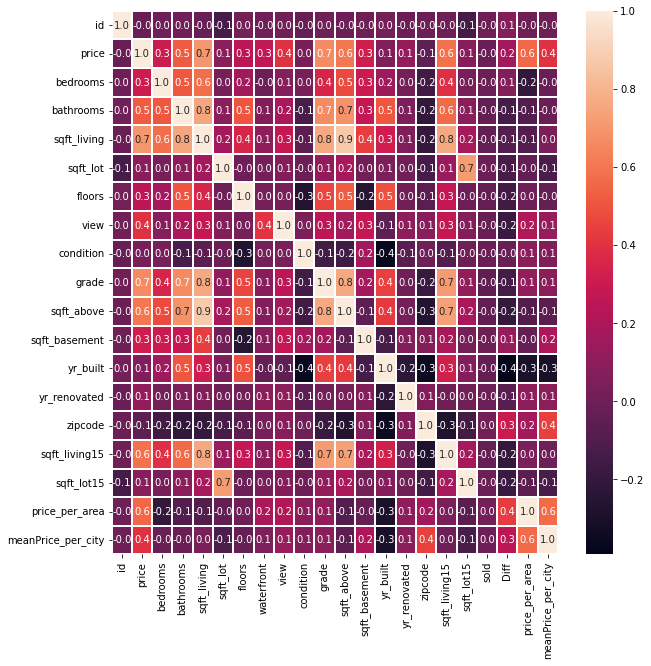

In [ ]:
# Analisando a correlação entre as colinas
correlation = df[['city', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'sold', 'Diff', 'market_value', 'price_per_area',
       'meanPrice_per_city']].corr().dropna()
plt.figure(figsize=[10,10])
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=1 )
plot

Foi avaliado que os principais dados a serem analisados são preço, grade e ára habitável dos imóveis.
Dando sequência às análises, foi preciso avaliar quais cidades estão com o mercado imobiliário mais movimentado.

In [ ]:
# Colunas escolhidas
df2 = df[['id', 'date', 'price','sold', 'Diff', 'city', 'price_per_area', 'market_value','is_basement']].dropna()
df2

,id,date,price,sold,Diff,city,price_per_area,market_value,is_basement
94,6021501535,2014-12-23,700000.00,True,270000.00,Seattle,443.04,Valorizou,1
314,4139480200,2014-12-09,1400000.00,True,16000.00,Bellevue,326.34,Valorizou,1
325,7520000520,2015-03-11,240500.00,True,8500.00,Seattle,193.95,Valorizou,1
346,3969300030,2014-12-29,239900.00,True,74900.00,Seattle,239.90,Valorizou,0
372,2231500030,2015-03-24,530000.00,True,215000.00,Seattle,243.12,Valorizou,1
...,...,...,...,...,...,...,...,...,...
20181,7853400250,2015-02-19,645000.00,True,35000.00,Snoqualmie,221.65,Valorizou,0
20613,2724049222,2014-12-01,220000.00,True,56200.00,Seattle,220.00,Valorizou,1
20670,8564860270,2015-03-30,502000.00,True,52010.00,North Bend,187.31,Valorizou,0
20780,6300000226,2015-05-04,380000.00,True,140000.00,Seattle,316.67,Valorizou,0


Analisando as cidades presentes na lista.

In [ ]:
# Contabilizando os imóveis por cidade
df2['city'].value_counts()

Seattle          88
Renton           17
Bellevue         12
Federal Way      11
Kent              8
Sammamish         7
Redmond           6
Auburn            5
Maple Valley      3
Woodinville       3
Snoqualmie        3
Kirkland          3
North Bend        2
Issaquah          2
Fall City         1
Kenmore           1
Bothell           1
Vashon            1
Carnation         1
Black Diamond     1
Medina            1
Name: city, dtype: int64

As cidades com maior movimentação de mercado são:


* Seattle
* Renton
* Bellevue
* Federal way






Após avaliar as regiões com maior movimentação de mercado, é preciso avaliar quais regiões apresentam maior valorização dos imóveis.


In [ ]:
#buscando a média por cidade da valorização ou desvalorização
mediaValorizacao = df2.groupby(['city'])['Diff'].mean()
mediaValorizacao.sort_values()

city
Black Diamond   -40000.00
Issaquah          4000.00
Carnation        27500.00
Snoqualmie       40544.67
Medina           65000.00
Maple Valley     78333.33
Redmond          78630.83
Auburn           83980.00
Federal Way      85361.09
Woodinville      86833.33
North Bend       89505.00
Fall City        94500.00
Bellevue        100701.75
Renton          101536.76
Kent            104059.38
Vashon          108500.00
Sammamish       164392.86
Kenmore         167500.00
Seattle         173492.38
Kirkland        189966.67
Bothell         210000.00
Name: Diff, dtype: float64

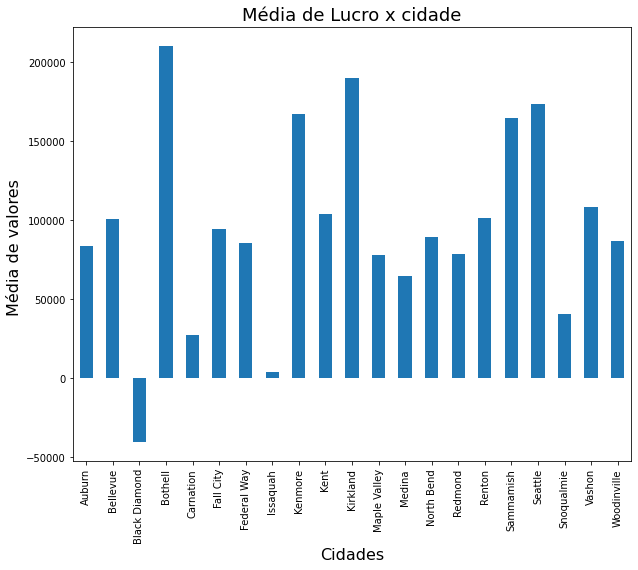

In [ ]:
# Avaliando graficamente a média de valorização das cidades

df3 = df2['Diff'].groupby(df2['city']).mean() 
plt.figure(figsize=(10,8))
df3.plot.bar();
plt.title('Média de Lucro x cidade', fontsize=18);
plt.ylabel('Média de valores ', fontsize=16);
plt.xlabel('Cidades', fontsize=16);

Avaliando os dados acima, percebe-se que 5 cidades apresentam alta média de valorização:
* Seattle
* Bothell
* Kenmore
* Kirkland
* Sammamish

Também conclui-se que não seria vantagem comprar casa em: 
- Black Diamond.

Porém, ao comparar com os dados de movimentação de mercado, avalia-se que a única cidade com movimentação suficiente do setor imobiliário e média alta de valorização é Seattle.

Tendo em vista a possibilidade de lucro em Seattle, julgou-se válido avaliar imóveis sem venda repetida registrada devido a possibilidade maior de lucro.

In [ ]:
#Avaliando preço de imóveis não vendidos (possibilidade de lucro)

df3 = df.loc[df['sold'] == False]
df3

,city,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,sold,Diff,market_value,price_per_area,meanPrice_per_city,is_basement
0,Seattle,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,...,47.51,-122.26,1340,5650,False,NaN,NaN,188.05,304.77,0
1,Seattle,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,...,47.72,-122.32,1690,7639,False,NaN,NaN,209.34,304.77,1
2,Kenmore,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,...,47.74,-122.23,2720,8062,False,NaN,NaN,233.77,225.14,0
3,Seattle,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,...,47.52,-122.39,1360,5000,False,NaN,NaN,308.16,304.77,1
4,Sammamish,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,...,47.62,-122.05,1800,7503,False,NaN,NaN,303.57,267.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,Seattle,263000018,2014-05-21,360000.00,3,2.50,1530,1131,3.00,0,...,47.70,-122.35,1530,1509,False,NaN,NaN,235.29,304.77,0
21609,Seattle,6600060120,2015-02-23,400000.00,4,2.50,2310,5813,2.00,0,...,47.51,-122.36,1830,7200,False,NaN,NaN,173.16,304.77,0
21610,Seattle,1523300141,2014-06-23,402101.00,2,0.75,1020,1350,2.00,0,...,47.59,-122.30,1020,2007,False,NaN,NaN,394.22,304.77,0
21611,Issaquah,291310100,2015-01-16,400000.00,3,2.50,1600,2388,2.00,0,...,47.53,-122.07,1410,1287,False,NaN,NaN,250.00,260.55,0


In [ ]:
# Fixando em Seattle
imoveisSeattle = df3.loc[df['city'] == 'Seattle']
imoveisSeattle

,city,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,sold,Diff,market_value,price_per_area,meanPrice_per_city,is_basement
0,Seattle,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,...,47.51,-122.26,1340,5650,False,NaN,NaN,188.05,304.77,0
1,Seattle,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,...,47.72,-122.32,1690,7639,False,NaN,NaN,209.34,304.77,1
3,Seattle,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,...,47.52,-122.39,1360,5000,False,NaN,NaN,308.16,304.77,1
7,Seattle,2008000270,2015-01-15,291850.00,3,1.50,1060,9711,1.00,0,...,47.41,-122.31,1650,9711,False,NaN,NaN,275.33,304.77,0
8,Seattle,2414600126,2015-04-15,229500.00,3,1.00,1780,7470,1.00,0,...,47.51,-122.34,1780,8113,False,NaN,NaN,128.93,304.77,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21607,Seattle,2997800021,2015-02-19,475000.00,3,2.50,1310,1294,2.00,0,...,47.58,-122.41,1330,1265,False,NaN,NaN,362.60,304.77,1
21608,Seattle,263000018,2014-05-21,360000.00,3,2.50,1530,1131,3.00,0,...,47.70,-122.35,1530,1509,False,NaN,NaN,235.29,304.77,0
21609,Seattle,6600060120,2015-02-23,400000.00,4,2.50,2310,5813,2.00,0,...,47.51,-122.36,1830,7200,False,NaN,NaN,173.16,304.77,0
21610,Seattle,1523300141,2014-06-23,402101.00,2,0.75,1020,1350,2.00,0,...,47.59,-122.30,1020,2007,False,NaN,NaN,394.22,304.77,0


Text(0.5, 1.0, 'price - Seattle')

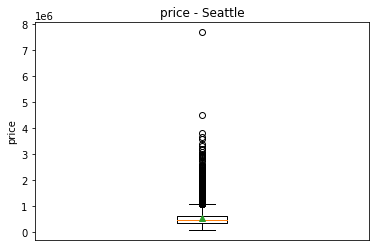

In [ ]:
# Avaliando outliers de Seattle
fig = plt.figure()
df4 = df3.loc[df['city'] == "Seattle"]
plt.boxplot(df4['price'], showmeans = True)
plt.ylabel('price')
plt.xticks([1], [''])
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False)
plt.title("price - Seattle", loc = 'center')

Text(0.5, 1.0, 'grade - Seattle')

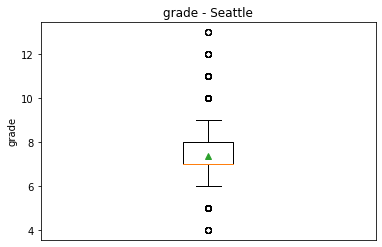

In [ ]:
# Avaliando boxplot de grade de Seattle
fig = plt.figure()

plt.boxplot(imoveisSeattle['grade'], showmeans = True)
plt.ylabel('grade')
plt.xticks([1], [''])
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False)
plt.title("grade - Seattle", loc = 'center')

Text(0.5, 1.0, 'sqft_living - Seattle')

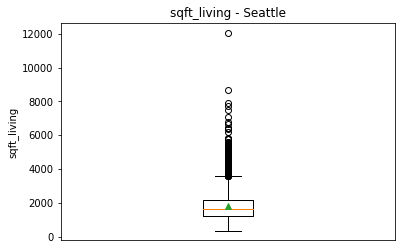

In [ ]:
#Avaliando boxplot de área Habitável de Seattle
fig = plt.figure()

plt.boxplot(imoveisSeattle['sqft_living'], showmeans = True)
plt.ylabel('sqft_living')
plt.xticks([1], [''])
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False)
plt.title("sqft_living - Seattle", loc = 'center')

In [ ]:
imoveisSeattle['sqft_living'].describe()

count    8889.00
mean     1797.90
std       799.65
min       370.00
25%      1240.00
50%      1640.00
75%      2190.00
max     12050.00
Name: sqft_living, dtype: float64

In [ ]:
imoveisSeattle['grade'].describe()

count   8889.00
mean       7.35
std        1.01
min        4.00
25%        7.00
50%        7.00
75%        8.00
max       13.00
Name: grade, dtype: float64

In [ ]:
imoveisSeattle['price'].describe()

count      8889.00
mean     535667.91
std      341310.70
min       78000.00
25%      337500.00
50%      453000.00
75%      630000.00
max     7700000.00
Name: price, dtype: float64

In [ ]:
# Calculando a média de grade de Seattle

grade_mean = imoveisSeattle['grade'].mean()
grade_mean

7.345708178647767

In [ ]:
# Calculando a média de área habitável em Seattle

sqft_living_mean = imoveisSeattle['sqft_living'].mean()
sqft_living_mean

1797.898863764203

In [ ]:
# Calculando a média de preço em Seattle

price_mean = imoveisSeattle['price'].mean()
price_mean

535667.9129260884

Para encontrar os imóveis a serem indicados, foi preciso escolher parâmetros de exclusão. Logo, os imóveis a serem comprados devem ter preço baixo e grade e área habitável elevados.

Inicialmente, usou-se a média como limiar dos parâmetros, porém não trouxe a especificação suficientemente necessária. Então foi decidido por fixar o valor de grade em 8 e selecionar a maior área habitável possível. O limiar de preço foi o primeiro quartil.

In [ ]:
# Removendo outliers
indicacao = imoveisSeattle.loc[ (imoveisSeattle['grade'] < 9) & (imoveisSeattle['grade'] > 6) & (imoveisSeattle['price'] < (imoveisSeattle['price'].quantile(1))) & (imoveisSeattle['sqft_living'] < (imoveisSeattle['sqft_living'].quantile(1)))]
indicacao



,city,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,sold,Diff,market_value,price_per_area,meanPrice_per_city,is_basement
0,Seattle,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,...,47.51,-122.26,1340,5650,False,NaN,NaN,188.05,304.77,0
1,Seattle,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,...,47.72,-122.32,1690,7639,False,NaN,NaN,209.34,304.77,1
3,Seattle,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,...,47.52,-122.39,1360,5000,False,NaN,NaN,308.16,304.77,1
7,Seattle,2008000270,2015-01-15,291850.00,3,1.50,1060,9711,1.00,0,...,47.41,-122.31,1650,9711,False,NaN,NaN,275.33,304.77,0
8,Seattle,2414600126,2015-04-15,229500.00,3,1.00,1780,7470,1.00,0,...,47.51,-122.34,1780,8113,False,NaN,NaN,128.93,304.77,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21607,Seattle,2997800021,2015-02-19,475000.00,3,2.50,1310,1294,2.00,0,...,47.58,-122.41,1330,1265,False,NaN,NaN,362.60,304.77,1
21608,Seattle,263000018,2014-05-21,360000.00,3,2.50,1530,1131,3.00,0,...,47.70,-122.35,1530,1509,False,NaN,NaN,235.29,304.77,0
21609,Seattle,6600060120,2015-02-23,400000.00,4,2.50,2310,5813,2.00,0,...,47.51,-122.36,1830,7200,False,NaN,NaN,173.16,304.77,0
21610,Seattle,1523300141,2014-06-23,402101.00,2,0.75,1020,1350,2.00,0,...,47.59,-122.30,1020,2007,False,NaN,NaN,394.22,304.77,0


In [ ]:
# Contando valores da coluna 'sqft_living' do dataframe 'indicacao'
indicacao['sqft_living'].value_counts()

1320    64
1660    58
1270    57
1480    57
1530    56
        ..
3290     1
3510     1
1465     1
2672     1
1425     1
Name: sqft_living, Length: 427, dtype: int64

In [ ]:
# Contando valores da coluna 'grade' do dataframe 'indicacao'

indicacao['grade'].value_counts()

7    4238
8    2270
Name: grade, dtype: int64

Realizando os cálculos de quais imóveis comprar (em Seattle)


In [ ]:
# Isolando imóveis para indicação de compra

indicacao.loc[(indicacao['grade'] == 8) & (indicacao['sqft_living'] > (indicacao['sqft_living'].quantile(0.96))) & (indicacao['price'] < (indicacao['price'].quantile(.25))) & (indicacao['is_basement'] == 1)]


,city,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,sold,Diff,market_value,price_per_area,meanPrice_per_city,is_basement
5668,Seattle,8159300050,2015-03-12,355425.00,4,2.50,3238,9112,1.00,0,...,47.40,-122.31,3056,9668,False,NaN,NaN,109.77,304.77,1
6831,Seattle,8835900086,2014-09-02,350000.00,4,3.00,3380,16133,1.00,0,...,47.55,-122.26,2500,11100,False,NaN,NaN,103.55,304.77,1
8296,Seattle,7844200120,2015-04-13,340000.00,4,2.50,3020,8750,1.00,0,...,47.43,-122.29,1900,8750,False,NaN,NaN,112.58,304.77,1
10360,Seattle,1180000885,2014-10-30,340500.00,3,2.50,3070,5871,3.00,0,...,47.50,-122.22,2220,4000,False,NaN,NaN,110.91,304.77,1
21186,Seattle,7896300592,2015-01-14,303500.00,6,4.50,3390,7200,2.00,0,...,47.52,-122.29,2040,7214,False,NaN,NaN,89.53,304.77,1


Realizando os cálculos de quais imóveis não comprar (em Seattle)

In [ ]:
# Isolando imóveis para contra indicação de compra
nao_indicacao = indicacao.loc[(indicacao['grade'] == 7) & (indicacao['sqft_living'] < (indicacao['sqft_living'].quantile(0.235))) & (indicacao['price'] > (indicacao['price'].quantile(.92))) & (indicacao['is_basement'] == 0)]
nao_indicacao

,city,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,sold,Diff,market_value,price_per_area,meanPrice_per_city,is_basement
1030,Seattle,2267000160,2014-10-20,900000.00,4,2.00,1190,8190,1.50,0,...,47.69,-122.40,1190,1567,False,NaN,NaN,756.30,304.77,0
7196,Seattle,1959702045,2014-11-19,900000.00,2,1.00,1240,5500,1.00,0,...,47.65,-122.32,2080,4400,False,NaN,NaN,725.81,304.77,0
7530,Seattle,7228501745,2015-02-19,935000.00,4,2.00,1220,7489,2.00,0,...,47.61,-122.31,1220,3750,False,NaN,NaN,766.39,304.77,0
8785,Seattle,5100403405,2015-01-07,790000.00,3,1.00,1290,6380,1.50,0,...,47.70,-122.32,1630,6380,False,NaN,NaN,612.40,304.77,0
9294,Seattle,1257201095,2015-03-23,826000.00,2,1.00,1060,6120,1.00,0,...,47.67,-122.33,1730,4080,False,NaN,NaN,779.25,304.77,0


##4. Conclusão

 O objetivo de uma imobiliária é fazer a aquisição de imóveis e revenda visando lucro. Para ter maior oportunidade de lucro, é preciso procurar por boas oportunidades de negócio. Boas oportunidades de negócio necessitam de baixo custo e alto valor agregado. Com isso, entende-se que o processo proposto neste projeto segue os pontos necessários para atingir o objetivo da empresa.
Então, como indicação de imóveis para a aquisição, temos os seguintes ID's:
* 8159300050, 8835900086, 7844200120, 1180000885 e 7896300592	

Estes imóveis apresentam baixo custo, área habitável elevada e são construídos com materiais de qualidade. Pode-se afirmar que apresentam um bom custo-benefício e alto valor agregado. São boas escolhas de investimento.


Em linha contrária, apresentam-se as contraindicações abaixo, representados pelos seguintes ID's:
* 2267000160, 1959702045, 7228501745, 5100403405 e 1257201095

Estes imóveis tem um preço elevado, área habitável baixa, apesar dos bons materiais utilizados para as suas construções. Com isso, afirma-se que não representam bons exemplos para investimento, visto o baixo custo benefício e menor capacidade de lucro, devido ao custo elevado.